<a href="https://colab.research.google.com/github/Angela0330/Angela360XcX/blob/main/Regresion_a_la_media_estaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("HistData")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpbmxhn8/downloaded_packages’



# Regresión a la media

In [ ]:
%%R
library(HistData)
library(data.table)
data('GaltonFamilies')
GaltonFamilies<- data.table::data.table(GaltonFamilies)
GaltonFamilies


     family father mother midparentHeight children childNum gender childHeight
     <fctr>  <num>  <num>           <num>    <int>    <int> <fctr>       <num>
  1:    001   78.5   67.0           75.43        4        1   male        73.2
  2:    001   78.5   67.0           75.43        4        2 female        69.2
  3:    001   78.5   67.0           75.43        4        3 female        69.0
  4:    001   78.5   67.0           75.43        4        4 female        69.0
  5:    002   75.5   66.5           73.66        4        1   male        73.5
 ---                                                                          
930:    203   62.0   66.0           66.64        3        1   male        64.0
931:    203   62.0   66.0           66.64        3        2 female        62.0
932:    203   62.0   66.0           66.64        3        3 female        61.0
933:    204   62.5   63.0           65.27        2        1   male        66.5
934:    204   62.5   63.0           65.27        2  

In [ ]:
%%R

GaltonFamilies_males <- GaltonFamilies[GaltonFamilies$gender == "male"]
GaltonFamilies_males

     family father mother midparentHeight children childNum gender childHeight
     <fctr>  <num>  <num>           <num>    <int>    <int> <fctr>       <num>
  1:    001   78.5   67.0           75.43        4        1   male        73.2
  2:    002   75.5   66.5           73.66        4        1   male        73.5
  3:    002   75.5   66.5           73.66        4        2   male        72.5
  4:    003   75.0   64.0           72.06        2        1   male        71.0
  5:    004   75.0   64.0           72.06        5        1   male        70.5
 ---                                                                          
477:    199   64.0   64.0           66.56        7        2   male        68.0
478:    200   64.0   63.0           66.02        1        1   male        64.5
479:    201   64.0   60.0           64.40        2        1   male        66.0
480:    203   62.0   66.0           66.64        3        1   male        64.0
481:    204   62.5   63.0           65.27        2  

[1] "Estatura promedio de padres: 69.14"
[1] "Varianza en la estatura de padres: 5.32"
[1] "Desv estandar de la estatura de los padres: 2.31"
[1] "Estatura promedio de padres: 69.14"
[1] "Varianza en la estatura de padres: 5.32"
[1] "Desv estandar de la estatura de los padres: 2.31"
[1] "Estatura promedio de hijos: 69.23"
[1] "Varianza en la estatura de hijos: 6.88"
[1] "Desv estandar de la estatura de los hijos: 2.62"


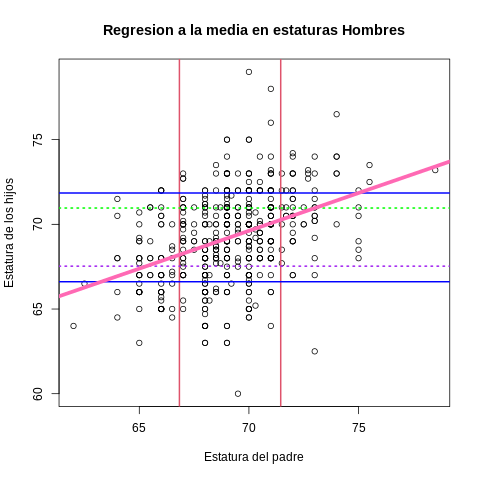

In [91]:
%%R
x<- GaltonFamilies_males$father
y<- GaltonFamilies_males$childHeight

par(mfrow =c(1,1))
plot(x,y, main= "Regresion a la media en estaturas Hombres", xlab= "Estatura del padre", ylab= "Estatura de los hijos")

#Datos estadísticos de los padres
Estatura_prom_padres <- round(mean(x),2)
Var_estatura_padres<- round(var(x),2)
Stnd<- round(sd(x),2)

print(paste('Estatura promedio de padres:', Estatura_prom_padres) ) #Estatura Promedio del padre
print(paste('Varianza en la estatura de padres:', Var_estatura_padres))
print(paste('Desv estandar de la estatura de los padres:', Stnd))

#Datos estadísticos de los padres
Estatura_prom_padres <- round(mean(x),2)
Var_estatura_padres<- round(var(x),2)
Stnd<- round(sd(x),2)

print(paste('Estatura promedio de padres:', Estatura_prom_padres) ) #Estatura Promedio del padre
print(paste('Varianza en la estatura de padres:', Var_estatura_padres))
print(paste('Desv estandar de la estatura de los padres:', Stnd))

#Lineas padres
corte_alto_padre <- Estatura_prom_padres + Stnd
corte_bajo_padre <- Estatura_prom_padres - Stnd
abline(v=corte_alto_padre, col=2,lwd= 2)
abline(v=corte_bajo_padre, col=2,lwd= 2)

#Datos estadisticos de los hijos
Estatura_prom_hijos <- round(mean(y),2)
Var_estatura_hijos<- round(var(y),2)
Stnd_hijos<- round(sd(y),2)

print(paste('Estatura promedio de hijos:', Estatura_prom_hijos) ) #Estatura Promedio del padre
print(paste('Varianza en la estatura de hijos:', Var_estatura_hijos))
print(paste('Desv estandar de la estatura de los hijos:', Stnd_hijos))

corte_alto_hijo <- Estatura_prom_hijos + Stnd_hijos
corte_bajo_hijo<- Estatura_prom_hijos - Stnd_hijos
abline(h=corte_alto_hijo, col="blue", lwd= 2)
abline(h=corte_bajo_hijo, col="blue", lwd= 2)


#Estataura de los hijos cuyos padres son considerados altos
#Hipotesis: en promedio los hijos de padres altos tmb son altos
abline(h=mean(y[x>corte_alto_padre]),lwd= 2, lty=3, col="green")

#Estataura promedio de los hijos cuyos padres son considerados bajos
#Hipotesis: en promedio los hijos de padres bajos tmb son bajos
abline(h=mean(y[x<corte_bajo_padre]),lwd= 2, lty=3, col="purple")

#Regresion lineal
reg <- lm(y~x)
summary(reg)
abline(reg, col="hotpink", lwd=5) # Agrega la línea de regresión en rojo


# # ∴ En promedio los hijos de padres altos no son altos, son promedio. Y de igual forma en promedio los hijos de padres bajos no son bajos, sino promedio.